<a href="https://colab.research.google.com/github/Saeif-Saleh/AppPortfolio/blob/master/Classify_different_antennas_2450_175_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow


Tue Mar  3 00:29:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/Antenna/R2450_175.mat')

In [25]:
print(list(matlab_data.keys())[3:])

['R2450_T2450_test', 'R2450_T2450_train', 'R2450_T500_test', 'R2450_T500_train', 'R2450_T900_test', 'R2450_T900_train']


In [0]:
train_900=matlab_data['R2450_T900_train']
train_2450=matlab_data['R2450_T2450_train']
train_500=matlab_data['R2450_T500_train']
# train_lime=matlab_data['R2450_Tlime_train']

In [6]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(80964360, 2)
(81362077, 2)
(79670780, 2)


In [0]:
test_900=matlab_data['R2450_T900_test']
test_2450=matlab_data['R2450_T2450_test']
test_500=matlab_data['R2450_T500_test']
# test_lime=matlab_data['R2450_T2450_test']

In [27]:
print(test_900.shape)
print(test_2450.shape)
print(test_500.shape)

(16289065, 2)
(14714767, 2)
(14282288, 2)


In [28]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(33554432, 2)
(33554432, 2)
(33554432, 2)


In [0]:
#Slicing data to be divisible by 2**n 
# train_900=train_900[1000000:5194304]
# train_2450=train_2450[1000000:5194304]
# train_500=train_500[1000000:5194304]

train_900=train_900[1000000:34554432]
train_2450=train_2450[1000000:34554432]
train_500=train_500[1000000:34554432]






In [0]:
test_900=test_900[1000000:9388608]
test_2450=test_2450[1000000:9388608]
test_500=test_500[1000000:9388608]



In [32]:
#Concatenate training and test data
train_x=np.concatenate((train_900,train_2450,train_500),axis=0)
test_x=np.concatenate((test_900,test_2450,test_500),axis=0)
print(train_x.shape)
print(test_x.shape)


(94663296, 2)
(25165824, 2)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
test_x=test_x.reshape(-1,2,sample_size)

In [0]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:3*seprator]=2
# train_y[3*seprator:]=3
#Creating test_y
test_y=np.zeros(len(test_x))
seprator=int(len(test_y)/n_classes)
test_y[0:seprator]=0
test_y[seprator:2*seprator]=1
test_y[2*seprator:3*seprator]=2
# test_y[3*seprator:]=3

In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
test_y=tf.keras.utils.to_categorical(
    test_y,
    num_classes=n_classes,
    dtype='float32'
)

In [38]:
print(train_x.shape)
print(train_y.shape)

(739557, 2, 128)
(739557, 3)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [49]:
print(train_x.shape)
print(train_y.shape)

(591645, 128, 2, 1)
(591645, 3)


In [0]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)


In [22]:
   conv_model = tf.keras.models.Sequential()
#convolutional layer with rectified linear unit activation
   conv_model.add(tf.keras.layers.Conv2D(50, kernel_size=(1, 7),
                 activation='relu',padding="same",kernel_regularizer=regularizers.l2(0.0005),
                 input_shape=input_shape))
   conv_model.add(tf.keras.layers.Dropout(0.50))
   conv_model.add(tf.keras.layers.Conv2D(50, (2, 7), padding="same",activation='relu',kernel_regularizer=regularizers.l2(0.0005)))
  #  conv_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
   conv_model.add(tf.keras.layers.Dropout(0.50))

   

#64 convolution filters used each of size 3x3
#choose the best features via pooling
  #  conv_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
#randomly turn neurons on and off to improve convergence

  #  conv_model.add(tf.keras.layers.Conv2D(128, kernel_size=(2,1),
  #                activation='relu',padding="same",
  #                input_shape=input_shape))
  #  conv_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#32 convolution filters used each of size 3x3
#again
#randomly turn neurons on and off to improve convergence
  #  conv_model.add(tf.keras.layers.Dropout(0.5))
#flatten since too many dimensions, we only want a classification output
   conv_model.add(tf.keras.layers.Flatten())
#fully connected to get all relevant data
   conv_model.add(tf.keras.layers.Dense(256, activation='relu'))
   conv_model.add(tf.keras.layers.Dropout(0.5))
   conv_model.add(tf.keras.layers.Dense(80, activation='relu'))
#one more dropout for convergence' sake :) 
   conv_model.add(tf.keras.layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
   conv_model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
   conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   conv_model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 256, 50)        400       
_________________________________________________________________
dropout (Dropout)            (None, 2, 256, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 256, 50)        35050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 256, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6553856   
_________________________________________

In [71]:

conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10,shuffle=True)

Train on 838860 samples, validate on 209716 samples
Epoch 1/10
838860/838860 [==============================] - 143s 170us/sample - loss: 1.1011 - acc: 0.4826 - val_loss: 0.9185 - val_acc: 0.6125
Epoch 2/10
838860/838860 [==============================] - 142s 169us/sample - loss: 1.0418 - acc: 0.5296 - val_loss: 1.1105 - val_acc: 0.4873
Epoch 3/10
838860/838860 [==============================] - 139s 166us/sample - loss: 0.9128 - acc: 0.6000 - val_loss: 1.9018 - val_acc: 0.3817
Epoch 4/10
838860/838860 [==============================] - 140s 166us/sample - loss: 0.7299 - acc: 0.6994 - val_loss: 1.5016 - val_acc: 0.4870
Epoch 5/10
838860/838860 [==============================] - 139s 166us/sample - loss: 0.6625 - acc: 0.7278 - val_loss: 2.1377 - val_acc: 0.3330
Epoch 6/10
239872/838860 [=======>......................] - ETA: 1:27 - loss: 0.6594 - acc: 0.7279

KeyboardInterrupt: ignored

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [52]:
conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10,shuffle=True)

Train on 473316 samples, validate on 118329 samples
Epoch 1/10
473316/473316 [==============================] - 125s 265us/sample - loss: 1.0965 - acc: 0.4173 - val_loss: 1.0441 - val_acc: 0.4128
Epoch 2/10
473316/473316 [==============================] - 125s 265us/sample - loss: 1.0572 - acc: 0.4468 - val_loss: 1.6731 - val_acc: 0.4783
Epoch 3/10
473316/473316 [==============================] - 125s 265us/sample - loss: 0.3103 - acc: 0.8849 - val_loss: 0.0519 - val_acc: 0.9866
Epoch 4/10
473316/473316 [==============================] - 126s 267us/sample - loss: 0.1454 - acc: 0.9493 - val_loss: 0.0465 - val_acc: 0.9869
Epoch 5/10
473316/473316 [==============================] - 126s 265us/sample - loss: 0.1222 - acc: 0.9573 - val_loss: 0.0312 - val_acc: 0.9916
Epoch 6/10
473316/473316 [==============================] - 127s 268us/sample - loss: 0.1093 - acc: 0.9623 - val_loss: 0.0156 - val_acc: 0.9961
Epoch 7/10
473316/473316 [==============================] - 127s 267us/sample - loss

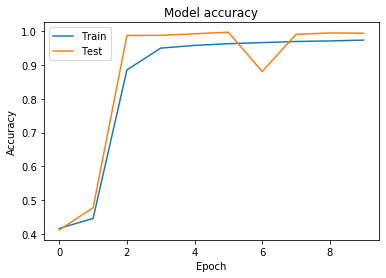

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

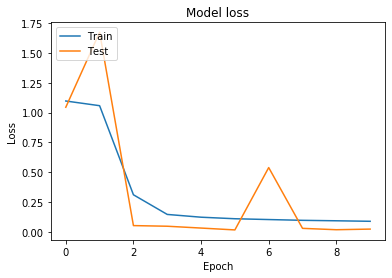

In [54]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


In [56]:
conv_model.evaluate(test_x,test_y)

196608/196608 [==============================] - 17s 85us/sample - loss: 0.0879 - acc: 0.9832


[0.08790283244840942, 0.98321533]

In [0]:
import pandas as pd
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))


Figure(720x504)


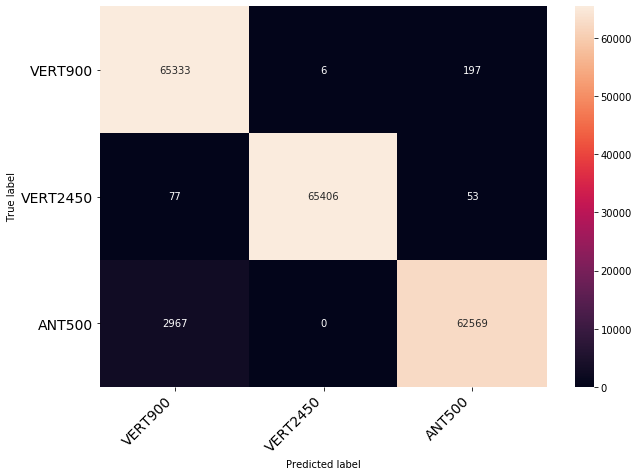

In [61]:
print(print_confusion_matrix(matrix,['VERT900','VERT2450','ANT500']))